# homework 1

In [13]:
import pandas as pd

df_raw_data = pd.read_excel("dataset.xls", header=None)

### Find mean values by cols


In [14]:
NAME_OF_FEATURES = ['FEATURE1', 'FEATURE2', 'FEATURE3', 'FEATURE4', 'FEATURE5', 'FEATURE6']

df_raw_data.columns = NAME_OF_FEATURES

for col in df_raw_data.columns:
    print(f"Mean value for colunmn {col} = {df_raw_data[col].mean()}")
    print('\n')

Mean value for colunmn FEATURE1 = 39.298507462686565


Mean value for colunmn FEATURE2 = 2.0869565217391304


Mean value for colunmn FEATURE3 = 19861.764705882353


Mean value for colunmn FEATURE4 = 10.101449275362318


Mean value for colunmn FEATURE5 = 20852.941176470587


Mean value for colunmn FEATURE6 = 198492.53731343284




### find std for cols

In [15]:
for col in df_raw_data.columns:
    print(f"standart deviation for colunmn {col} = {df_raw_data[col].std()}")
    print('\n')

standart deviation for colunmn FEATURE1 = 8.700426540176295


standart deviation for colunmn FEATURE2 = 0.9961562958335907


standart deviation for colunmn FEATURE3 = 10169.342710701167


standart deviation for colunmn FEATURE4 = 4.932321156044054


standart deviation for colunmn FEATURE5 = 10692.813468731472


standart deviation for colunmn FEATURE6 = 99837.3485003769




### find median 

In [16]:
for col in df_raw_data.columns:
    print(f"median for colunmn {col} = {df_raw_data[col].median()}")
    print('\n')

median for colunmn FEATURE1 = 38.0


median for colunmn FEATURE2 = 2.0


median for colunmn FEATURE3 = 20250.0


median for colunmn FEATURE4 = 9.0


median for colunmn FEATURE5 = 20500.0


median for colunmn FEATURE6 = 200000.0




### find Q1(25%), Q2(50%), Q3(75%)

In [17]:
for col in df_raw_data.columns:
    print(f"Q1 for colunmn {col} = {df_raw_data[col].quantile(0.25)}")
    print(f"Q2 for colunmn {col} = {df_raw_data[col].quantile(0.5)}")
    print(f"Q3 for colunmn {col} = {df_raw_data[col].quantile(0.75)}")
    print('\n')

Q1 for colunmn FEATURE1 = 34.0
Q2 for colunmn FEATURE1 = 38.0
Q3 for colunmn FEATURE1 = 46.0


Q1 for colunmn FEATURE2 = 1.0
Q2 for colunmn FEATURE2 = 2.0
Q3 for colunmn FEATURE2 = 3.0


Q1 for colunmn FEATURE3 = 11125.0
Q2 for colunmn FEATURE3 = 20250.0
Q3 for colunmn FEATURE3 = 27125.0


Q1 for colunmn FEATURE4 = 7.0
Q2 for colunmn FEATURE4 = 9.0
Q3 for colunmn FEATURE4 = 14.0


Q1 for colunmn FEATURE5 = 12000.0
Q2 for colunmn FEATURE5 = 20500.0
Q3 for colunmn FEATURE5 = 28000.0


Q1 for colunmn FEATURE6 = 118000.0
Q2 for colunmn FEATURE6 = 200000.0
Q3 for colunmn FEATURE6 = 265500.0




### plot hist of features

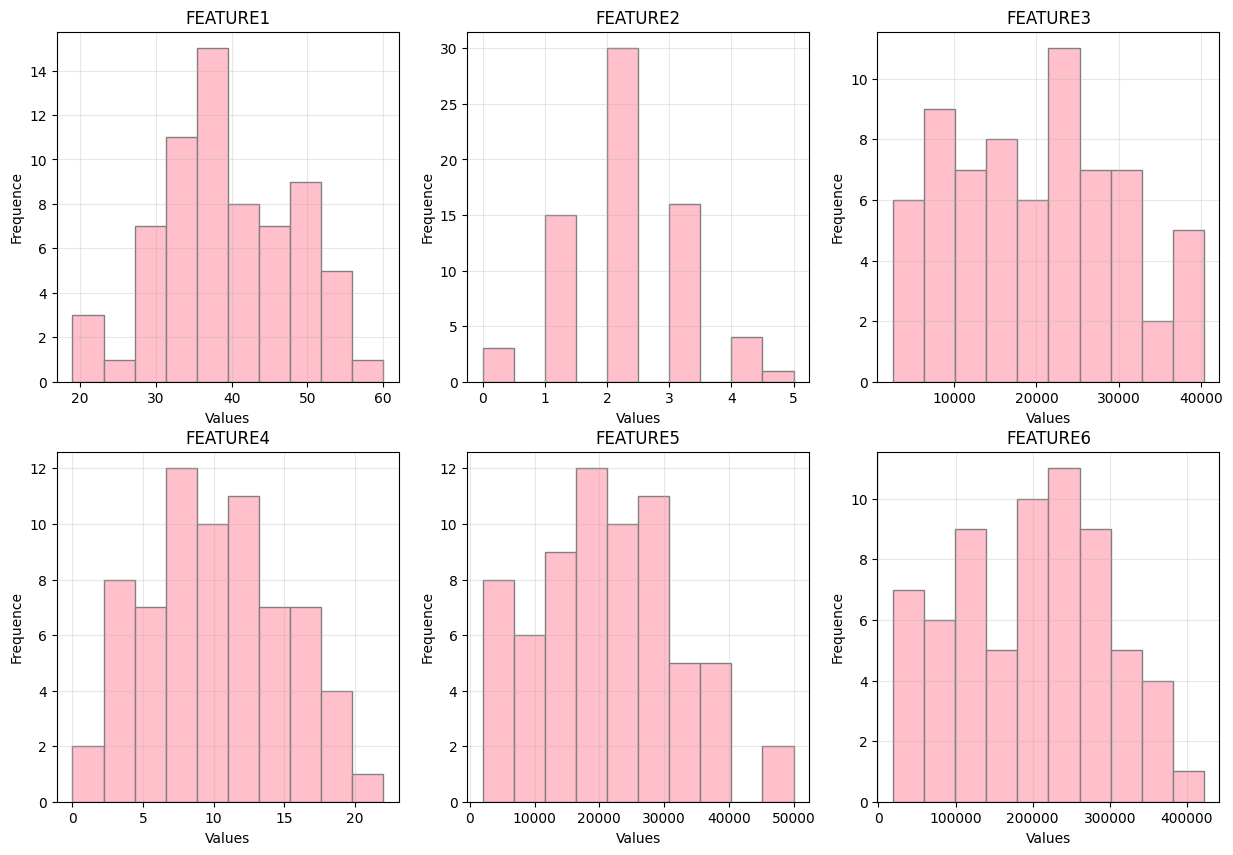

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(df_raw_data.columns):
    axes[i].hist(df_raw_data[col], color='pink', edgecolor='grey', bins=10)
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequence')
    axes[i].grid(alpha=0.3)



### plot boxplots

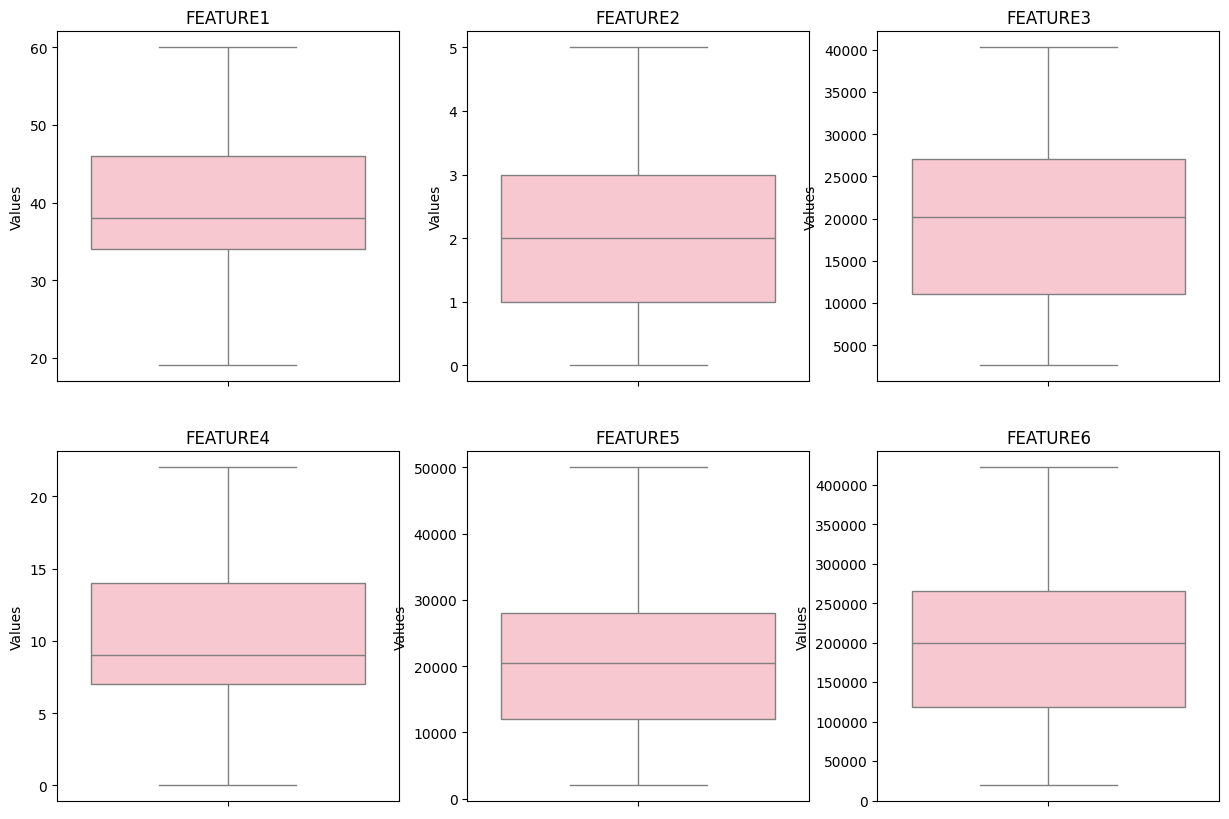

In [19]:
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(df_raw_data.columns):
    sns.boxplot(data=df_raw_data, y=col, ax=axes[i], color='pink', linecolor='grey')
    axes[i].set_title(col)
    axes[i].set_ylabel("Values")
    

## end of task 1 + сделать выводы 


## task 2 


In [20]:
print(f'В процентах\n{(df_raw_data.isnull().sum() / df_raw_data.count()) * 100} ')

В процентах
FEATURE1    7.462687
FEATURE2    4.347826
FEATURE3    5.882353
FEATURE4    4.347826
FEATURE5    5.882353
FEATURE6    7.462687
dtype: float64 


### use kNN

In [21]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=7, weights='distance')

df_data_wo_nans = imputer.fit_transform(df_raw_data)

In [22]:
df_data_wo_nans = df_data_wo_nans.round(0)
df_data_wo_nans = pd.DataFrame(df_data_wo_nans)

## end of task 2 

## task 3

In [23]:
import numpy as np

k = 0.3
mask = np.ones(len(df_data_wo_nans), dtype=bool)

for col in df_data_wo_nans.columns:
    q1 = df_data_wo_nans[col].quantile(0.25)
    q3 = df_data_wo_nans[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr 
    upper_bound = q3 + k * iqr 
    mask &= df_data_wo_nans[col].between(lower_bound, upper_bound)

    print(f'for {col} low = {lower_bound}, upp = {upper_bound}')


df_data_wo_nans_and_outliers = df_data_wo_nans[mask].copy()
print("rows original:", df_data_wo_nans.shape[0], "rows after outlier removal:", df_data_wo_nans_and_outliers.shape[0])

for 0 low = 30.55, upp = 48.95
for 1 low = 0.4, upp = 3.6
for 2 low = 6535.0, upp = 31015.0
for 3 low = 4.9, upp = 16.1
for 4 low = 7200.0, upp = 32800.0
for 5 low = 78125.0, upp = 308125.0
rows original: 72 rows after outlier removal: 32


In [24]:
print(f'rows in old df = {df_data_wo_nans.shape[0]}')
print(f'rows in new df = {df_data_wo_nans_and_outliers.shape[0]}')

rows in old df = 72
rows in new df = 32


## PCA

## Task 4

### centered data 

$$ X_{centr} = X - X_{mean} $$

In [25]:
import numpy as np

x = np.array(df_data_wo_nans_and_outliers)

In [26]:
# centered data

for col in range(x.shape[1]):
    npcol = x[:, col]
    npcol -= npcol.mean()


In [27]:
# check centered 

print(np.mean(x, axis=0, dtype=int))

[0 0 0 0 0 0]


In [28]:
# norm data

from numpy.linalg import linalg

for col in range(x.shape[1]):
    print(np.linalg.norm(x[:, col]))
    x[:, col]  = x[:, col] / np.linalg.norm(x[:, col])

27.294115666201755
3.142451272494134
42041.329188891614
17.24818831066034
39293.3677609848
413527.59077233134


In [29]:
# check normilized

print(np.linalg.norm(x, axis=0))

[1. 1. 1. 1. 1. 1.]


In [30]:
new_matr = pd.DataFrame(x)

## Task 5 - SVD 

In [31]:
u, s, vt = np.linalg.svd(x)

In [32]:
pd_u = pd.DataFrame(u)
pd_s = pd.DataFrame(s)
pd_vt = pd.DataFrame(vt)

## Task 6 

In [33]:
sum_of_factors = np.sum(s**2)
print(round(sum_of_factors, 2))
full_explained_percent = 0

for item in s:
    full_explained_percent += (item**2 / sum_of_factors)
    print(f'% of data = {round(item**2 / sum_of_factors, 5)}')

print(f'explained data = {round(full_explained_percent, 2)}')

6.0
% of data = 0.75784
% of data = 0.2065
% of data = 0.02657
% of data = 0.00699
% of data = 0.00183
% of data = 0.00027
explained data = 1.0


### factors 1, 2, 3 explain 83,8% of data


In [34]:
approx_col = list()

for i in range(6):
    tmp = np.array(s[0] * vt[i, 0] * u[:, 0] + s[1] * vt[i, 1]* u[:, 1]) 
    approx_col.append(tmp)

approx_matr = np.array(approx_col).T

### find norms (operations & Frob)

### Theorem of Enker-Young

$$ min_{rank = k}||Z - Z_k||_2 = \sigma_{k+1} $$

$$ min_{rank = k}||Z - Z_k||^2_F = \sigma_{k+1}^2 + ... + \sigma_{p}^2 $$

In [35]:
K_CONST = 2
p = min(x.shape)
print(f'p = {p}')
print(f'k = {K_CONST}')

p = 6
k = 2


In [36]:
norm_oper = s[K_CONST]
print(f'Operation norm = {norm_oper}')

Operation norm = 0.39929557033819046


In [37]:
import math

frob_norm = 0

for i in range(K_CONST,6):
    frob_norm += s[i]**2

print(f'Frob. norm = {math.sqrt(frob_norm)}')

print(f'relative error approx = {math.sqrt(frob_norm) / np.sum(s**2)}')

Frob. norm = 0.4625208822827103
relative error approx = 0.07708681371378505


## Task 8 

In [38]:
new_coor_matrix_clients = u[:2].T @ (np.diag(s[:2]) @ vt[:2])

In [39]:
client_map = u[:2].T @ np.diag(s[:2]) 

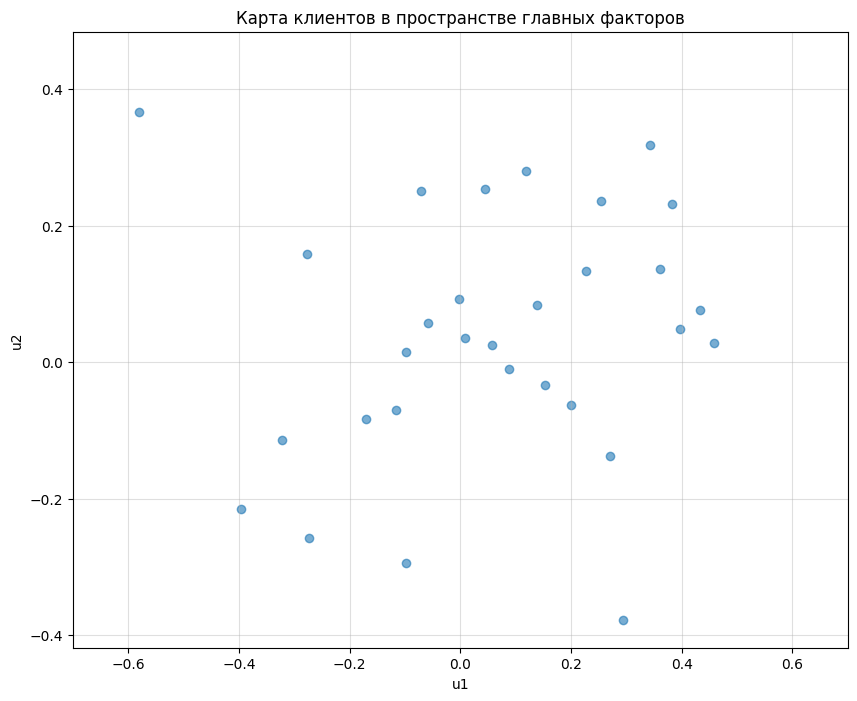

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

x = client_map[:, 0]  
y = client_map[:, 1]  

plt.xlim(-0.7, 0.7)

ax.scatter(x, y, alpha=0.6)
ax.set_xlabel('u1')
ax.set_ylabel('u2')
# ax.set_zlabel('u3')
plt.title('Карта клиентов в пространстве главных факторов')
plt.grid(alpha=0.4)
plt.show()

## Task 9

In [46]:
from scipy.spatial import distance
import numpy as np

matr_for_task_9_default = new_matr

D = distance.squareform(distance.pdist(matr_for_task_9_default, metric='euclidean'))

print(D)

[[0.         0.61059664 0.19701498 ... 0.50435297 0.42457118 0.23384644]
 [0.61059664 0.         0.60944856 ... 1.05156551 0.37580825 0.6580554 ]
 [0.19701498 0.60944856 0.         ... 0.44271905 0.48776259 0.06628517]
 ...
 [0.50435297 1.05156551 0.44271905 ... 0.         0.87032146 0.40142743]
 [0.42457118 0.37580825 0.48776259 ... 0.87032146 0.         0.55167408]
 [0.23384644 0.6580554  0.06628517 ... 0.40142743 0.55167408 0.        ]]


In [47]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(D)

print("Stress:", mds.stress_)

Stress: 0.19841445614531655


/Users/d3zzle/Desktop/methods of DA (Kalyagin)/hw_1/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


## Task 10

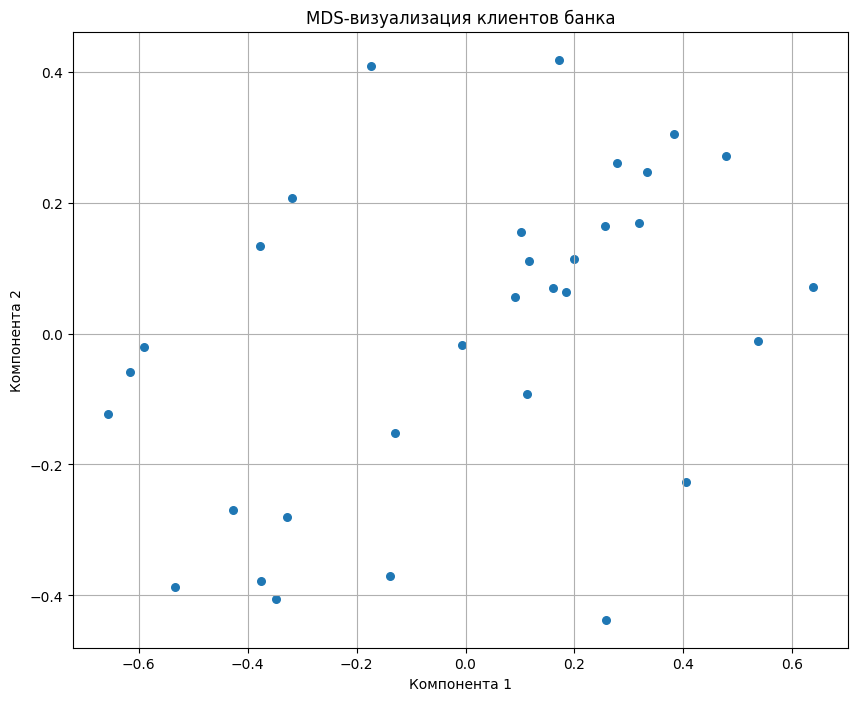

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], s=30)

plt.title("MDS-визуализация клиентов банка")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.grid(True)
plt.show()